# Forecasting: Peyton Manning Wikipedia Page Visits

<img src='Manning_cropped.jpg' style="width: 400px;"/>

This project is time-series analysis and forecasting of Peyton Manning Wikipedia page. I am using __[Prophet](https://facebook.github.io/prophet/docs/quick_start.html)__, automatic forecasting tool by Facebook, to analyze visit patterns, trends, seasonality and predict the future. 

Data can be found __[here](https://github.com/Nnebula/prophet/blob/master/examples/example_wp_peyton_manning.csv)__.


In [26]:
# packages
import pandas as pd
import numpy as np
from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# load data
path = '/Users/naghmeh/Documents/InsightHealthData/Codes/Prophet/prophet-master/'
df = pd.read_csv(path+'examples/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


Constructing a prophet object and then fit-transform the dataframe like sklearn objects.

In [17]:
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


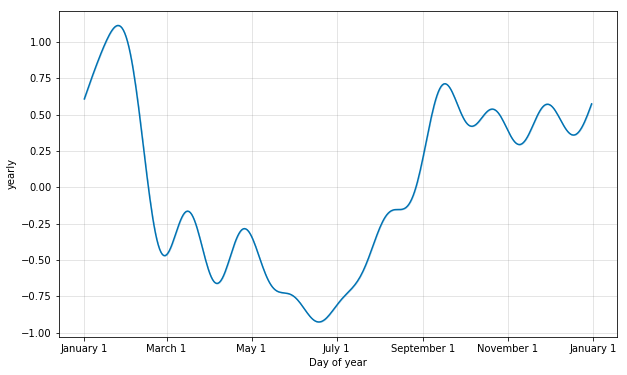

In [30]:
m.plot_yearly()

In [48]:
# dataframe for next two years
future = m.make_future_dataframe(periods=365*2)
future.tail()

,ds
3630,2018-01-15
3631,2018-01-16
3632,2018-01-17
3633,2018-01-18
3634,2018-01-19


In [49]:
# predict future visits
forecast = m.predict(future)
forecast.head()


,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-12-10,8.040399,8.040399,8.040399,8.235884,9.485590,0.802931,0.802931,0.802931,0.802931,0.802931,0.802931,0.352299,0.352299,0.352299,0.450632,0.450632,0.450632,8.843330
1,2007-12-11,8.038856,8.038856,8.038856,7.962023,9.202057,0.552993,0.552993,0.552993,0.552993,0.552993,0.552993,0.119640,0.119640,0.119640,0.433353,0.433353,0.433353,8.591849
2,2007-12-12,8.037313,8.037313,8.037313,7.770030,8.992305,0.350346,0.350346,0.350346,0.350346,0.350346,0.350346,-0.066663,-0.066663,-0.066663,0.417009,0.417009,0.417009,8.387659
3,2007-12-13,8.035770,8.035770,8.035770,7.719078,8.980302,0.329779,0.329779,0.329779,0.329779,0.329779,0.329779,-0.072265,-0.072265,-0.072265,0.402044,0.402044,0.402044,8.365549
4,2007-12-14,8.034227,8.034227,8.034227,7.707877,8.939767,0.319285,0.319285,0.319285,0.319285,0.319285,0.319285,-0.069581,-0.069581,-0.069581,0.388866,0.388866,0.388866,8.353512


In [51]:
# predictions denoted by yhat with confidence intervals
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3630,2018-01-15,8.127321,6.841840,9.344349
3631,2018-01-16,7.915861,6.666305,9.169038
3632,2018-01-17,7.749858,6.489550,8.988756
3633,2018-01-18,7.763461,6.513361,8.969237
3634,2018-01-19,7.784023,6.560416,9.094396


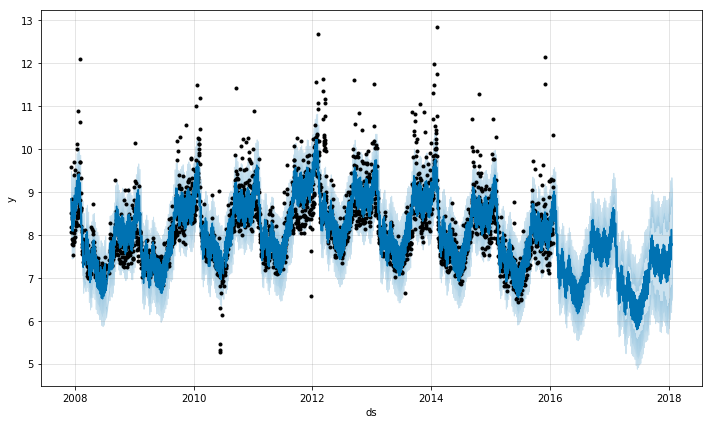

In [52]:
# plot the forecast
m.plot(forecast);


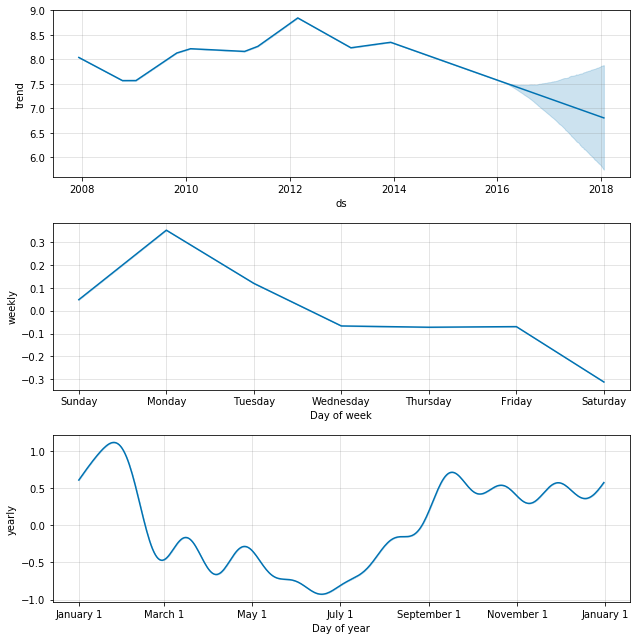

In [53]:
# plot trend, yearly seasonality, weekly seasonality
m.plot_components(forecast);


Cool eh!

The visits are the highest in around February when superbowl happens. The enthusiasm falls and slightly ramps up for the next event next year. 

It seems 2012 Manning's page was most visited since 2008, which is the year he signed the 5 year contract with Broncos.
It seems Peyton's page visits will drop in the follwoing years. Note that long term forecasting is associated with larger confidence intervals. 
